# Data Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Mean rides am/pm

In [24]:
all = pd.read_csv('data/preprocessed_data/all.csv')

In [25]:
all

,latitude,longitude,distance_to_center,year,month,weekday,pm,holiday,mean_temperature,total_precipitation,stations_count,elevation_meters,density,count
0,45.523319,-73.520127,4.380002,2014,4,1,0,False,5.8,8.9,455,11,1,1
1,45.510351,-73.556508,1.219082,2014,4,1,0,False,5.8,8.9,455,13,25,2
2,45.510351,-73.556508,1.219082,2014,4,1,1,False,5.8,8.9,455,13,25,3
3,45.511007,-73.567602,0.834790,2014,4,1,0,False,5.8,8.9,455,34,45,1
4,45.498112,-73.577615,0.915128,2014,4,1,0,False,5.8,8.9,455,54,34,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163546,45.500451,-73.661428,7.224160,2019,10,3,1,False,12.1,59.7,609,44,2,2
1163547,45.434987,-73.670799,11.011012,2019,10,3,0,False,12.1,59.7,609,25,3,1
1163548,45.560030,-73.681336,10.778511,2019,10,3,0,False,12.1,59.7,609,17,1,1
1163549,45.532265,-73.611063,4.585683,2019,10,3,0,False,12.1,59.7,609,67,31,15


In [26]:
am_rides = all[all['pm']==0]
pm_rides = all[all['pm']==1]

In [27]:
am_rides_mean = am_rides['count'].mean()
print(round(am_rides_mean,2))

13.4


In [28]:
pm_rides_mean = pm_rides['count'].mean()
print(round(pm_rides_mean,2))

29.96


### 1) Load data and investigate data types

In [2]:
# read rides data

# dict to hold each month's dataframe
dfs = {}

for month in range(4, 11):
    file_path = f'data/2019/OD_2019-{month:02d}.csv'
    # read dataframe and add to dict
    dfs[month] = pd.read_csv(file_path, parse_dates=[0, 2])

# investigate each month's dataframe
for month, df in dfs.items():
    print('\n', month)
    display(df.info())

/var/folders/m7/5lh2dbhn42d0kn6456wh8m9h0000gn/T/ipykernel_76932/3023297135.py:9: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs[month] = pd.read_csv(file_path, parse_dates=[0, 2])



 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237542 entries, 0 to 237541
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   start_date          237542 non-null  datetime64[ns]
 1   start_station_code  237542 non-null  int64         
 2   end_date            237542 non-null  datetime64[ns]
 3   end_station_code    237542 non-null  int64         
 4   duration_sec        237542 non-null  int64         
 5   is_member           237542 non-null  int64         
dtypes: datetime64[ns](2), int64(4)
memory usage: 10.9 MB


None


 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790323 entries, 0 to 790322
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   start_date          790323 non-null  datetime64[ns]
 1   start_station_code  790323 non-null  int64         
 2   end_date            790323 non-null  datetime64[ns]
 3   end_station_code    790323 non-null  int64         
 4   duration_sec        790323 non-null  int64         
 5   is_member           790323 non-null  int64         
dtypes: datetime64[ns](2), int64(4)
memory usage: 36.2 MB


None


 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 933409 entries, 0 to 933408
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   start_date          933409 non-null  datetime64[ns]
 1   start_station_code  933409 non-null  int64         
 2   end_date            933409 non-null  datetime64[ns]
 3   end_station_code    933409 non-null  int64         
 4   duration_sec        933409 non-null  int64         
 5   is_member           933409 non-null  int64         
dtypes: datetime64[ns](2), int64(4)
memory usage: 42.7 MB


None


 7
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102846 entries, 0 to 1102845
Data columns (total 6 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   start_date          1102846 non-null  datetime64[ns]
 1   start_station_code  1102846 non-null  int64         
 2   end_date            1102846 non-null  datetime64[ns]
 3   end_station_code    1102846 non-null  int64         
 4   duration_sec        1102846 non-null  int64         
 5   is_member           1102846 non-null  int64         
dtypes: datetime64[ns](2), int64(4)
memory usage: 50.5 MB


None


 8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045585 entries, 0 to 1045584
Data columns (total 6 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   start_date          1045585 non-null  datetime64[ns]
 1   start_station_code  1045585 non-null  object        
 2   end_date            1045585 non-null  datetime64[ns]
 3   end_station_code    1045585 non-null  object        
 4   duration_sec        1045585 non-null  int64         
 5   is_member           1045585 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 47.9+ MB


None


 9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870945 entries, 0 to 870944
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   start_date          870945 non-null  datetime64[ns]
 1   start_station_code  870945 non-null  int64         
 2   end_date            870945 non-null  datetime64[ns]
 3   end_station_code    870945 non-null  int64         
 4   duration_sec        870945 non-null  int64         
 5   is_member           870945 non-null  int64         
dtypes: datetime64[ns](2), int64(4)
memory usage: 39.9 MB


None


 10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617195 entries, 0 to 617194
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   start_date          617195 non-null  datetime64[ns]
 1   start_station_code  617195 non-null  int64         
 2   end_date            617195 non-null  datetime64[ns]
 3   end_station_code    617195 non-null  int64         
 4   duration_sec        617195 non-null  int64         
 5   is_member           617195 non-null  int64         
dtypes: datetime64[ns](2), int64(4)
memory usage: 28.3 MB


None

Columns **"start_station_code"** and **"end_station_code"** in the dataframe of **August** were not recognized as integer values. These columns might contain strings.

In [3]:
# investigate values of start_station_code
dfs[8]['start_station_code'].value_counts(ascending=True)[:10]

7085             1
7086             2
MTL-ECO5.1-01    3
7087             3
7088             3
7104             7
5002             7
7132             7
6271             7
7135             7
Name: start_station_code, dtype: int64

In [4]:
# add column for integer values, insert None when a value can not be converted

def to_int_or_none(val):
    try:
        return(int(val))
    except ValueError:
        return None

dfs[8]['start_station_code_int'] = dfs[8]['start_station_code'].apply(to_int_or_none)
dfs[8]['end_station_code_int'] = dfs[8]['end_station_code'].apply(to_int_or_none)

dfs[8].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045585 entries, 0 to 1045584
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   start_date              1045585 non-null  datetime64[ns]
 1   start_station_code      1045585 non-null  object        
 2   end_date                1045585 non-null  datetime64[ns]
 3   end_station_code        1045585 non-null  object        
 4   duration_sec            1045585 non-null  int64         
 5   is_member               1045585 non-null  int64         
 6   start_station_code_int  1045582 non-null  float64       
 7   end_station_code_int    1045582 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(2), object(2)
memory usage: 63.8+ MB


In [5]:
dfs[8][dfs[8]['start_station_code_int'].isna()]

,start_date,start_station_code,end_date,end_station_code,duration_sec,is_member,start_station_code_int,end_station_code_int
723939,2019-08-22 10:02:48,MTL-ECO5.1-01,2019-08-22 10:07:38,MTL-ECO5.1-01,289,1,NaN,NaN
725071,2019-08-22 11:01:53,MTL-ECO5.1-01,2019-08-22 11:07:23,MTL-ECO5.1-01,330,1,NaN,NaN
726467,2019-08-22 12:03:27,MTL-ECO5.1-01,2019-08-22 12:05:03,MTL-ECO5.1-01,95,1,NaN,NaN


In [6]:
dfs[8][dfs[8]['end_station_code_int'].isna()]

,start_date,start_station_code,end_date,end_station_code,duration_sec,is_member,start_station_code_int,end_station_code_int
723939,2019-08-22 10:02:48,MTL-ECO5.1-01,2019-08-22 10:07:38,MTL-ECO5.1-01,289,1,NaN,NaN
725071,2019-08-22 11:01:53,MTL-ECO5.1-01,2019-08-22 11:07:23,MTL-ECO5.1-01,330,1,NaN,NaN
726467,2019-08-22 12:03:27,MTL-ECO5.1-01,2019-08-22 12:05:03,MTL-ECO5.1-01,95,1,NaN,NaN


The only non-integer value seems to be "MTL-ECO5.1-01" which appears three times for start_station_code and end_station_code. These three rows are dropped.

In [7]:
dfs[8] = dfs[8].dropna()
dfs[8]['start_station_code'] = dfs[8]['start_station_code_int'].astype('int')
dfs[8]['end_station_code'] = dfs[8]['end_station_code_int'].astype('int')
dfs[8] = dfs[8].drop(columns=['start_station_code_int', 'end_station_code_int'])

dfs[8].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045582 entries, 0 to 1045584
Data columns (total 6 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   start_date          1045582 non-null  datetime64[ns]
 1   start_station_code  1045582 non-null  int64         
 2   end_date            1045582 non-null  datetime64[ns]
 3   end_station_code    1045582 non-null  int64         
 4   duration_sec        1045582 non-null  int64         
 5   is_member           1045582 non-null  int64         
dtypes: datetime64[ns](2), int64(4)
memory usage: 55.8 MB


/var/folders/m7/5lh2dbhn42d0kn6456wh8m9h0000gn/T/ipykernel_76932/2091520061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[8]['start_station_code'] = dfs[8]['start_station_code_int'].astype('int')
/var/folders/m7/5lh2dbhn42d0kn6456wh8m9h0000gn/T/ipykernel_76932/2091520061.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[8]['end_station_code'] = dfs[8]['end_station_code_int'].astype('int')


In [8]:
# combine all dataframes in one single dataframe
df_2019 = pd.concat(dfs.values()).reset_index(drop=True)

df_2019.head()

,start_date,start_station_code,end_date,end_station_code,duration_sec,is_member
0,2019-04-14 07:55:22,6001,2019-04-14 08:07:16,6132,713,1
1,2019-04-14 07:59:31,6411,2019-04-14 08:09:18,6411,587,1
2,2019-04-14 07:59:55,6097,2019-04-14 08:12:11,6036,736,1
3,2019-04-14 07:59:57,6310,2019-04-14 08:27:58,6345,1680,1
4,2019-04-14 08:00:37,7029,2019-04-14 08:14:12,6250,814,0


In [9]:
# read station data
stations = pd.read_csv('data/2019/Stations_2019.csv')

display(stations.head())
stations.info()

,Code,name,latitude,longitude
0,10002,Métro Charlevoix (Centre / Charlevoix),45.478228,-73.569651
1,4000,Jeanne-d'Arc / Ontario,45.549598,-73.541874
2,4001,Graham / Brookfield,45.520075,-73.629776
3,4002,Graham / Wicksteed,45.516937,-73.640483
4,5002,St-Charles / Montarville,45.533682,-73.515261


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619 entries, 0 to 618
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Code       619 non-null    int64  
 1   name       619 non-null    object 
 2   latitude   619 non-null    float64
 3   longitude  619 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 19.5+ KB


In [10]:
len(df_2019['start_station_code'].unique())

621

The rides dataframe contains 621 unique station codes while the stations dataframe only contains 619 unique station codes.

In [11]:
# difference between both sets
np.setdiff1d(df_2019['start_station_code'].unique(), stations['Code'])

array([6034, 6708])

In [12]:
len(df_2019[(df_2019['start_station_code'].isin([6034, 6708])) | (df_2019['end_station_code'].isin([6034, 6708]))])

24485

In [13]:
24485 / 1045582

0.02341757987417534

The stations with station codes 6034 and 6708 are not available in the stations dataframe. There are 24485 rows containing these stations as start or end station, which is 2% of the data. It would make sense to remove this data in case any positional data of the stations is used in the models.

### 2) Plot

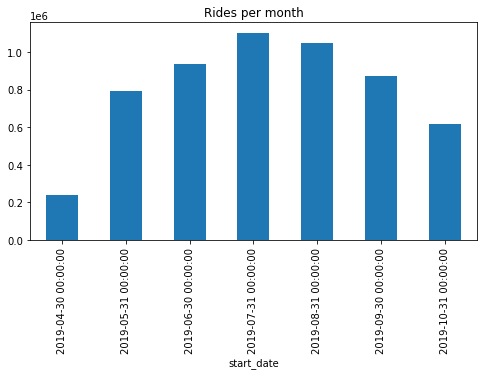

In [14]:
# plot total bike rides per month

rides_per_month = df_2019.groupby(pd.Grouper(key='start_date', freq='M'))['start_station_code'].count()

fig, ax = plt.subplots(figsize=(8, 4))

rides_per_month.plot(kind='bar', ax=ax)

ax.set_title('Rides per month')

plt.show()

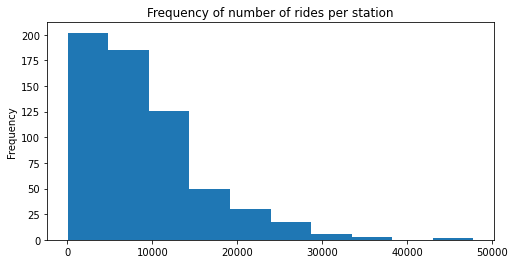

In [15]:
# plot histogram of total number of rides per station

rides_per_station = df_2019.groupby('start_station_code')['start_date'].count()

fig, ax = plt.subplots(figsize=(8, 4))

rides_per_station.plot(kind='hist', ax=ax)

ax.set_title('Frequency of number of rides per station')

plt.show()